# Health Insurance - Medical Cost Personal Datasets

Exploratory Data Analysis of a dataset of individual data from 1338 people.

### 1. Library import

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### 2. Dataset overview


In [2]:
data = pd.read_csv('insurance.csv')
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.describe()  # statistical overview of data in the dataset

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 4. Check for the volume of the dataset


In [4]:
data.shape  # the data is about 1338 Individuals

(1338, 7)

In [5]:
data.columns # facts about the Individuals

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### 5. Get an overview for missing Values in dataset

In [6]:
data_null = data.isnull().sum()
print(data_null)                  # there are no missing values in the dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### 6. Overview main categories

In [7]:
pd.crosstab(data['sex'],data['region'],margins=True)

# The Individuals come from four different regions in the US and the proportions of gender 
# and also for the region are almost equally distributed. 

region,northeast,northwest,southeast,southwest,All
sex,,,,,
female,161,164,175,162,662
male,163,161,189,163,676
All,324,325,364,325,1338


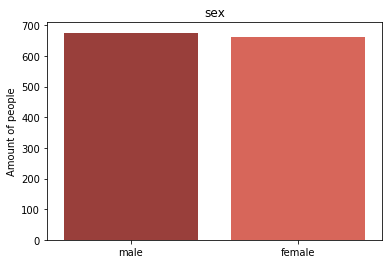

In [8]:
sns.barplot(x=data['sex'].value_counts().index,y=data['sex'].value_counts(), palette ='Reds_d')
plt.title('sex')
plt.ylabel('Amount of people')
plt.show()                       # simple graph for Individuals by sex

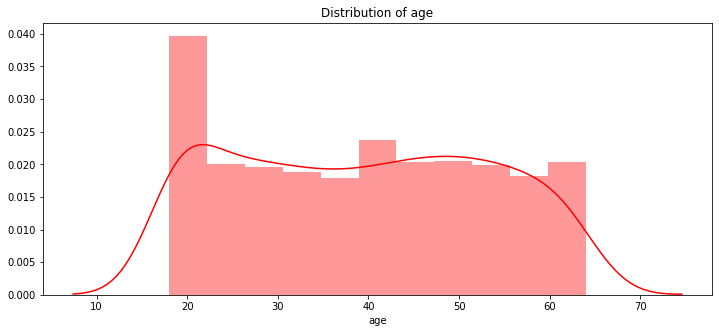

In [9]:
plt.figure(figsize=(12,5))
plt.title('Distribution of age')
ax = sns.distplot(data['age'], color = 'r')

# Individuals are almost uniform distributed (between age 18 and 64) but there is more data for the age around 20 up to 28
# The red line displayes the probability distribution function together with the univariat distribution of the observations.

In [10]:
data.mean() # The average age of the Individuals in the Dataset is about 39.21
            # The average bmi of the Individuals in the Dataset is about 30.66
            # The average Individuals in the Dataset has about 1.09 children
            # The cost of charges on average for each Individual is about 13279.42 USD

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

### 7. Main Question: What are the factors that have an impact on the amount of charges - Risk-factors?
#### A correlation matrix can give a good overview about the characteristics which have an impact on the amount of charges to pay.

In [11]:
# The variables sex,smoker,region are categorical variables. 
# The LabelEncoder converts each class under specified feature to a numerical value.

# sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker 
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [12]:
data.corr()   # The fact of beeing a smoker or not, has the biggest impact on the costs for insurances (0.78 = high correlation)
              # There are two more characteristics that correlate with the amount of charges. It is the BMI and the Age. 
              # The correlation values are low so the strenght of the correlation is moderate (1 = perfect correlation).

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


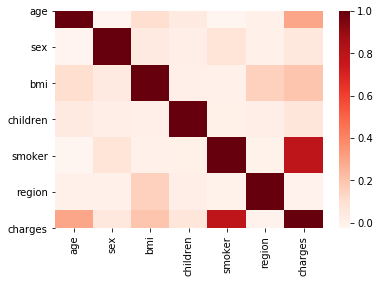

In [13]:
correlation = data.corr()
sns.heatmap(correlation, cmap='Reds')   # The matrix plot displays the same correlation. 
                                        # It's another way to show the different correlations in one moment.   
                                        # Here it's even more clear that being a smoker has the highest correlation.

#### Risk-factor being a smoker 

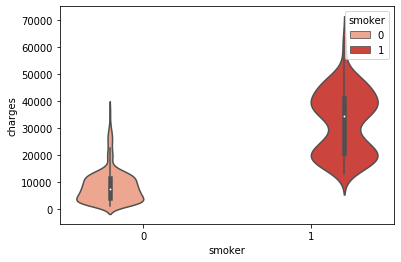

In [14]:
sns.violinplot(x = 'smoker', y = 'charges', data = data, hue = 'smoker', palette=('Reds'), figsize=(10, 8))
plt.show()

# 0 (the light orange field) is the picture for non-smoker
# 1 (the dark orange field) is the picture for smoker

#### In the plot it is clearly to see that there is a big difference between smoker and non-smoker. Smoker pay on average more than non-smoker. The difference in the amount of costs in the group of smoker is also bigger. Furthermore, the plot for the Individuals that are smoker is multimodal, which means that the data has more than one peak in the distribution.

In [15]:
data_smoker = data[['smoker','charges']].groupby('smoker').mean()
data_smoker.sort_values('charges',ascending=False)
round(data_smoker,2) 

# On average, the costs an insurance company has for smoker are about 32050.23 USD and for non-smoker is about 8434.23 USD.  

,charges
smoker,
0,8434.27
1,32050.23


In [16]:
smoker_costs = data_smoker['charges'][0]/data_smoker['charges'][1]
smoker_costs

# The costs for non-smoker are only around 26% of the costs an insurance company has to pay for a smoker.

0.26315779374669246

#### Risk-factor high body-mass-index (bmi) 

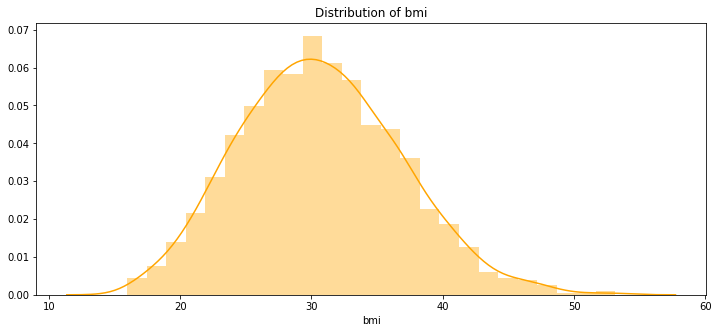

In [17]:
plt.figure(figsize=(12,5))
plt.title('Distribution of bmi')
ax = sns.distplot(data['bmi'], color = 'orange')

# The distribution of the different bmi's is normal.

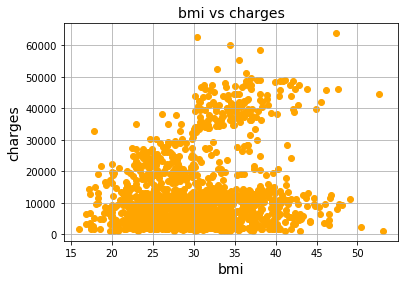

In [18]:
plt.scatter(data['bmi'], data['charges'], color='orange')
plt.title('bmi vs charges', fontsize=14)
plt.xlabel('bmi', fontsize=14)
plt.ylabel('charges', fontsize=14)
plt.grid(True)
plt.show()

# The scatterplot visualizes the weak correlation but also the tendency. 
# People with a higher bmi tend to be more cost intensive for insurance companies.

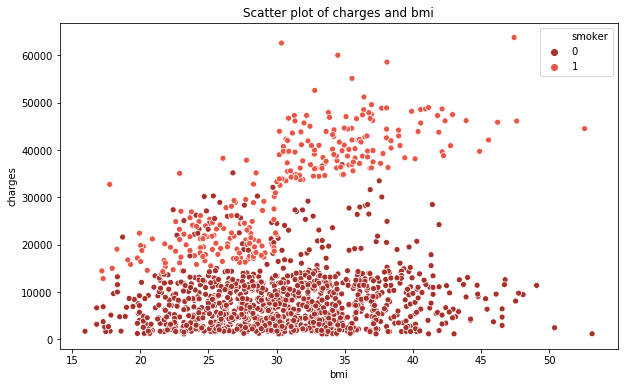

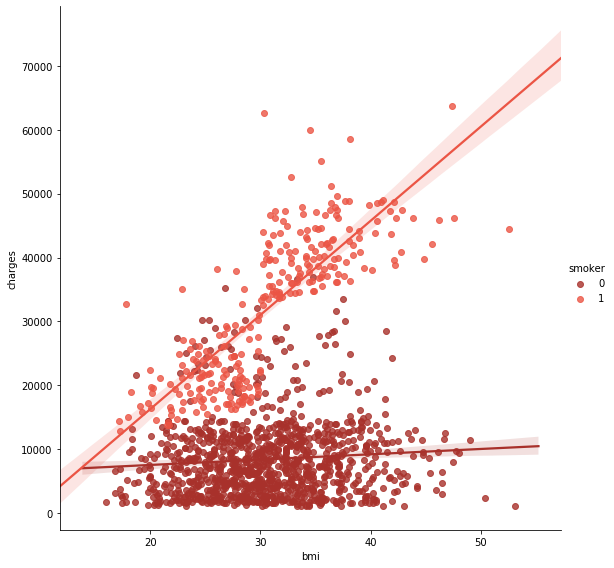

In [19]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data, palette='Reds_d', hue='smoker')
ax.set_title('Scatter plot of charges and bmi')
sns.lmplot(x='bmi', y='charges', hue='smoker', data=data, palette='Reds_d', height=8)

#### The plots above picture all individuals by bmi, being a smoker and charges. The effect of smoking on the costs are even more visible. The regression models (pictured in the second plot) also describe a high correlation. The shade next to each line pictures the confidence intervall of the modell, which is 95% in this cases.

#### Risk-factor age

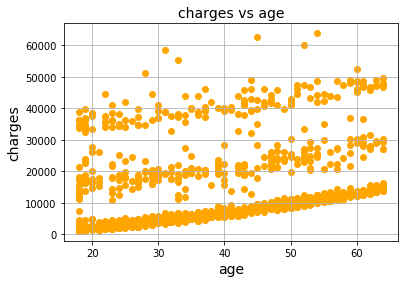

In [20]:
plt.scatter(data['age'],data['charges'], color='orange')
plt.title('charges vs age', fontsize=14)
plt.xlabel('age', fontsize=14)
plt.ylabel('charges', fontsize=14)
plt.grid(True)
plt.show()

# The scatterplot visualizes the weak correlation between age and charges but also the tendency. 
# Older people tend to be more cost intensive for insurance companies than younger people.

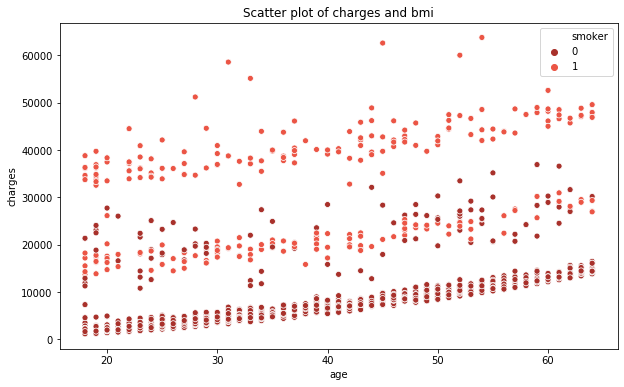

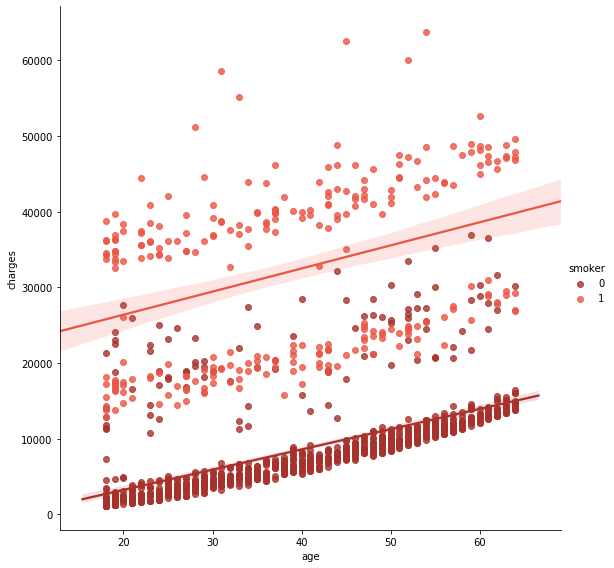

In [21]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='age',y='charges',data=data, palette='Reds_d', hue='smoker')
ax.set_title('Scatter plot of charges and bmi')
sns.lmplot(x='age', y='charges', hue='smoker', data=data, palette='Reds_d', height=8)

#### The plots above picture all individuals by age, being a smoker and charges. Smoker are more cost-intensive and the costs increase with age for both groups (smoker and non-smoker). The regression models (pictured in the second plot) also describe a high correlation. The shade next to each line pictures the confidence intervall of the modell, which is 95% in this cases.

#### Regional Differences

In [22]:
data2 = pd.read_csv('insurance.csv') # create dataframe with categorial variables

In [23]:
data_region = data2[['charges','region']].groupby('region').mean()
data_region = data_region.sort_values('charges',ascending=False)
data_region

,charges
region,
southeast,14735.411438
northeast,13406.384516
northwest,12417.575374
southwest,12346.937377


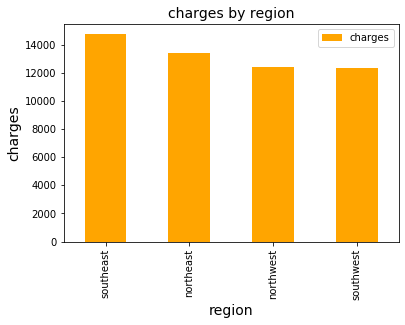

In [24]:
data_region.plot.bar(color='orange')
plt.title('charges by region', fontsize=14)
plt.xlabel('region', fontsize=14)
plt.ylabel('charges', fontsize=14)
plt.show()

#### The differences between the regions is not very high but it it is to see that the costs are higher in the east of the US compared to the west. 